In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset Reading**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Thesis/DATASET OF HOSPITAL- English.csv")

**Dataset Shape**

In [ ]:
#df.info()
df.shape

(1000, 6)

In [ ]:
df.head(10)

,SL,User Name,Rating,Review,Medical Name,Resource_Link
0,1,MM Opel,5.0,Chittagong Medical College (CMC) is situated i...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
1,2,NEJAM UDDIN,5.0,This Medical is the oldest institution in chit...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
2,3,Hridoy Nandi,5.0,Chittagong Medical College Hospital was establ...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
3,4,Sumon Rahman,4.0,One of the most important and old medical coll...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
4,5,Chowdhury Ripan,3.0,"can say, Not a great service you can get due ...",Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
5,6,A H Edus,3.0,Not bad ..\nBut Something big happenings is go...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
6,7,Fahima Alam Rumpa,1.0,It was my Alma mater. And I am truly ashamed t...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
7,8,Md. Nesar Uddin,5.0,Great Medical in Chattagram.,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
8,9,Mohammad Taslim,5.0,a year ago\nOne of the biggest & busy governme...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
9,10,Mizu,3.0,The efforts given by the doctors are substanti...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."


# **DATA PREPROCESSING / FEATURE ENGINEERING**


In [ ]:
# Lower casing 
df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for
x in x.split()))


In [ ]:
# Removing all the special Characters
df['Review'] = df['Review'].str.replace('[^\w\s]', "")

# Removing all the non ASCII characters
df['Review'] = df['Review'].str.replace(r'[^\x00-\x7F]+',' ')

# Removing the leading and trailing Whitespaces
df['Review'] = df['Review'].str.replace(r'^\s+|\s+?$','')

# Replacing multiple Spaces with Single Space
df['Review'] = df['Review'].str.replace(r'\s+',' ')

 # Replacing Two or more dots with one
df['Review'] = df['Review'].str.replace(r'\.{2,}', ' ')

df.head(5)

,SL,User Name,Rating,Review,Medical Name,Resource_Link
0,1,MM Opel,5.0,chittagong medical college cmc is situated in ...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
1,2,NEJAM UDDIN,5.0,this medical is the oldest institution in chit...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
2,3,Hridoy Nandi,5.0,chittagong medical college hospital was establ...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
3,4,Sumon Rahman,4.0,one of the most important and old medical coll...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."
4,5,Chowdhury Ripan,3.0,can say not a great service you can get due to...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841..."


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Review.head()

0    chittagong medical college cmc situated port c...
1    medical oldest institution chittagong cityit c...
2    chittagong medical college hospital establishe...
3    one important old medical college hospital ban...
4    say great service get due rush incoming existi...
Name: Review, dtype: object

Spelling Correction
# **Data Lemmatization**

In [ ]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Review.head()

0    chittagong medical college cmc situated port c...
1    medical oldest institution chittagong cityit c...
2    chittagong medical college hospital establishe...
3    one important old medical college hospital ban...
4    say great service get due rush incoming existi...
Name: Review, dtype: object

In [ ]:
df.columns

Index(['SL', 'User Name', 'Rating', 'Review', 'Medical Name', 'Resource_Link'], dtype='object')

In [ ]:
df.Rating.value_counts()

5.0    603
4.0    241
3.0     86
1.0     45
2.0     23
Name: Rating, dtype: int64

# **Data Visualization**

In [ ]:
import seaborn as sns

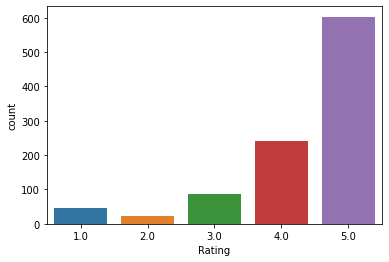

In [ ]:
sns.countplot(data = df, x = 'Rating')

In [ ]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews_dt = df
# Dropping null values
reviews_dt.dropna(inplace=True)

In [ ]:
score_1 = reviews_dt[reviews_dt['Rating'] == 1]
score_2 = reviews_dt[reviews_dt['Rating'] == 2]
score_3 = reviews_dt[reviews_dt['Rating'] == 3]
score_4 = reviews_dt[reviews_dt['Rating'] == 4]
score_5 = reviews_dt[reviews_dt['Rating'] == 5]

In [ ]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

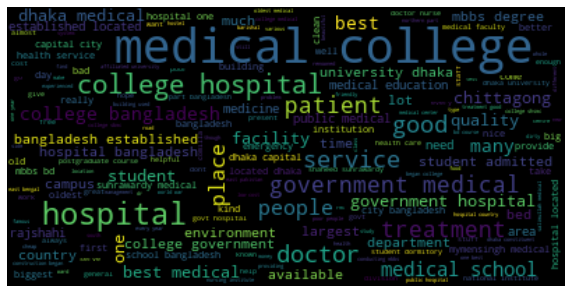

In [ ]:
#Wordcloud for frequently appeared words in review.
reviews_str = reviews_sample.Review.str.cat()
wordcloud = WordCloud(background_color='black').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#spliting the data into Negative (rating is 1 or 2), Positive (4 or 5) and Neutral (3) Reviews.
negative_reviews = reviews_sample[reviews_sample['Rating'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Rating'].isin([4,5]) ]
neutral_reviews = reviews_sample[reviews_sample['Rating'].isin([3]) ]

#concatenating all Summaries into a single string.
#Transform to single string
negative_reviews_str = negative_reviews.Review.str.cat()
positive_reviews_str = positive_reviews.Review.str.cat()
neutral_reviews_str = neutral_reviews.Review.str.cat()

In [ ]:
wordcloud_negative = WordCloud(background_color='black').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
wordcloud_neutral = WordCloud(background_color='black').generate(neutral_reviews_str)


Text(0.5, 1.0, 'Reviews with Negative ratings')

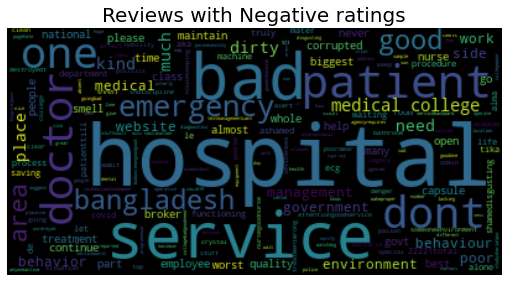

In [ ]:
#Wordcloud for Negative Words in reviews.
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative ratings',fontsize=20)

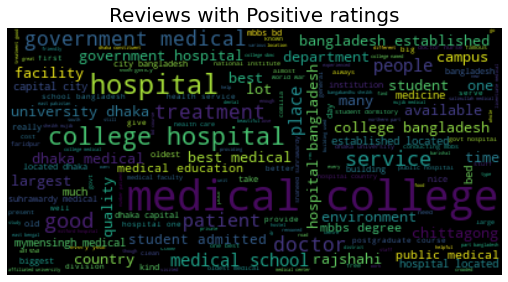

In [ ]:
#Wordcloud for Positive Words in reviews.
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive ratings',fontsize=20)
plt.show()

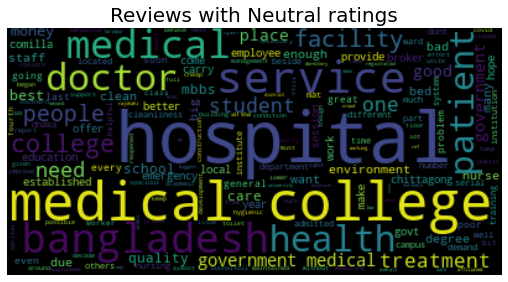

In [ ]:
#Wordcloud for Neutral Words in reviews.
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_neutral,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Neutral ratings',fontsize=20)
plt.show()

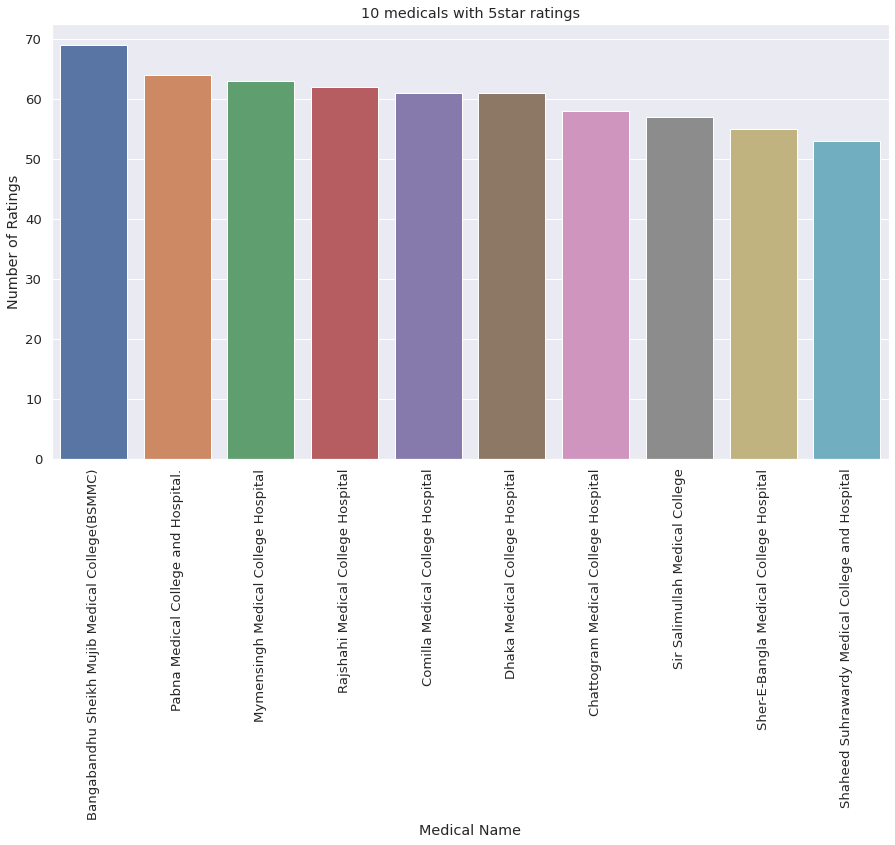

In [ ]:
# This barplot shows all the medicals with 5 star ratings.
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating_star = dict(reviews_dt.loc[reviews_dt.Rating == 5, "Medical Name"].value_counts())
Medical_Name = list(rating_star.keys())
Medical_rating = list(rating_star.values())

sns_rating = sns.barplot(x = Medical_Name[0:20], y = Medical_rating[0:20])

sns_rating.set_title('10 medicals with 5star ratings')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Medical Name")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

# **Rule/Lexicon based Sentiment Analysis approach**

# **TextBlob**

In [ ]:
def get_polarity(text):
  return TextBlob(text).sentiment.polarity
#Creating new dataframe with sentiments
df['Polarity'] = df['Review'].apply(get_polarity)
df.Polarity.head()

0    0.030556
1    0.067857
2    0.087413
3    0.207692
4    0.168750
Name: Polarity, dtype: float64

# **VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Analyzer**

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.0 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
textt="I am good student."
analyzer.polarity_scores(textt)


{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [ ]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Review']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
    
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.031,0.858,0.111,0.7699
1,0.074,0.855,0.072,-0.0202
2,0.000,0.928,0.072,0.8176
3,0.080,0.782,0.138,0.5267
4,0.073,0.698,0.229,0.6808


In [ ]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(5)

,SL,User Name,Rating,Review,Medical Name,Resource_Link,Polarity,neg,neu,pos,compound
0,1,MM Opel,5.0,chittagong medical college cmc situated port c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.030556,0.031,0.858,0.111,0.7699
1,2,NEJAM UDDIN,5.0,medical oldest institution chittagong cityit c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.067857,0.074,0.855,0.072,-0.0202
2,3,Hridoy Nandi,5.0,chittagong medical college hospital establishe...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.087413,0.000,0.928,0.072,0.8176
3,4,Sumon Rahman,4.0,one important old medical college hospital ban...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.207692,0.080,0.782,0.138,0.5267
4,5,Chowdhury Ripan,3.0,say great service get due rush incoming existi...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.168750,0.073,0.698,0.229,0.6808


**If The compound score is = 0  then the review is Neutral.**

**If The compound score is > 0 then the review is Positive.**

***If The compound score is < 0 then the review is Negative. ***

In [ ]:
#Vader
# Convert scores into positive, negative and neutral sentiments using a threshold function
def f_tags(df_c):
    if df_c['compound'] > 0:
        val = "Positive"
    elif df_c['compound'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_c['Sentiment_Type_Vader'] = df_c.apply(f_tags, axis=1)

#TextBlob
# Convert scores into positive, negative and neutral sentiments using a threshold function
def f_tagss(df_c):
    if df_c['Polarity'] > 0:
        vals = "Positive"
    elif df_c['Polarity'] == 0:
        vals = "Neutral"
    else:
        vals = "Negative"
    return vals
df_c['Sentiment_Type_TextBlob'] = df_c.apply(f_tagss, axis=1)
df_c.head(5)

,SL,User Name,Rating,Review,Medical Name,Resource_Link,Polarity,neg,neu,pos,compound,Sentiment_Type_Vader,Sentiment_Type_TextBlob
0,1,MM Opel,5.0,chittagong medical college cmc situated port c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.030556,0.031,0.858,0.111,0.7699,Positive,Positive
1,2,NEJAM UDDIN,5.0,medical oldest institution chittagong cityit c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.067857,0.074,0.855,0.072,-0.0202,Negative,Positive
2,3,Hridoy Nandi,5.0,chittagong medical college hospital establishe...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.087413,0.000,0.928,0.072,0.8176,Positive,Positive
3,4,Sumon Rahman,4.0,one important old medical college hospital ban...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.207692,0.080,0.782,0.138,0.5267,Positive,Positive
4,5,Chowdhury Ripan,3.0,say great service get due rush incoming existi...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.168750,0.073,0.698,0.229,0.6808,Positive,Positive


# **Sentiment Analysis result**

# Vader Sentiment Analysis Plot

Positive    671
Neutral     245
Negative     82
Name: Sentiment_Type_Vader, dtype: int64

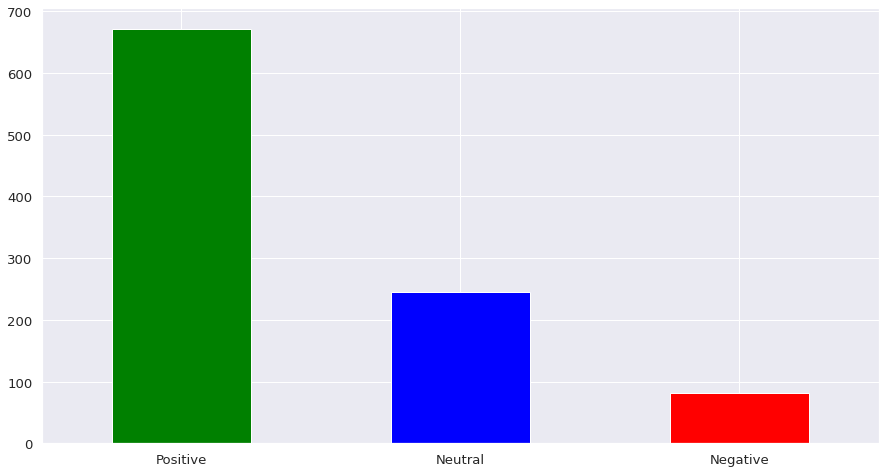

In [ ]:
result=df_c['Sentiment_Type_Vader'].value_counts()
result.plot(kind='bar', rot=0, color=['green','blue','red']);
df_c.Sentiment_Type_Vader.value_counts() 

# TextBlob Sentiment Analysis Plot 

Positive    684
Neutral     234
Negative     80
Name: Sentiment_Type_TextBlob, dtype: int64

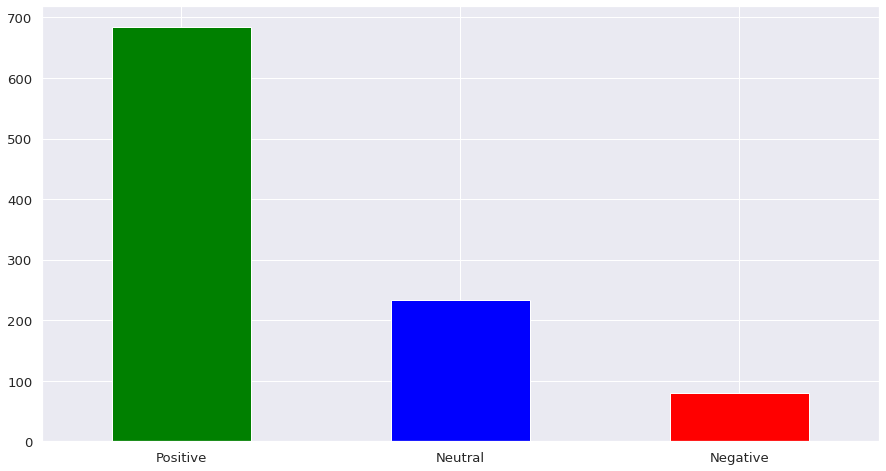

In [ ]:
results=df_c['Sentiment_Type_TextBlob'].value_counts()
results.plot(kind='bar', rot=0, color=['green','blue','red']);
df_c.Sentiment_Type_TextBlob.value_counts()

# **Data Labeling**



**Label the original data by Rating Stars**

In [ ]:
def new(df_c):
    if df_c['Rating'] >= 4:
        nv = "1"
    elif df_c['Rating'] == 3:
        nv = "0"
    else:
        nv = "-1"
    return nv
df_c['Label'] = df_c.apply(new, axis=1)

df_c.head()

,SL,User Name,Rating,Review,Medical Name,Resource_Link,Polarity,neg,neu,pos,compound,Sentiment_Type_Vader,Sentiment_Type_TextBlob,Label
0,1,MM Opel,5.0,chittagong medical college cmc situated port c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.030556,0.031,0.858,0.111,0.7699,Positive,Positive,1
1,2,NEJAM UDDIN,5.0,medical oldest institution chittagong cityit c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.067857,0.074,0.855,0.072,-0.0202,Negative,Positive,1
2,3,Hridoy Nandi,5.0,chittagong medical college hospital establishe...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.087413,0.000,0.928,0.072,0.8176,Positive,Positive,1
3,4,Sumon Rahman,4.0,one important old medical college hospital ban...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.207692,0.080,0.782,0.138,0.5267,Positive,Positive,1
4,5,Chowdhury Ripan,3.0,say great service get due rush incoming existi...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.168750,0.073,0.698,0.229,0.6808,Positive,Positive,0


**Functions for Lebeling to the Vader Sentiment Prediction & TextBlob Sentiment Prediction**

In [ ]:
#Function to Label the positive sentiment into 1, negative sentiment into -1 and neutral sentiment into 0.
def new_c(df_c):
    if df_c['Sentiment_Type_Vader'] == 'Positive':
        nvv = "1"
    elif df_c['Sentiment_Type_Vader'] == 'Negative':
        nvv = "-1"
    else:
        nvv = "0"
    return nvv
df_c['Senti_Label_Vader'] = df_c.apply(new_c, axis=1)

#Function to Label the positive sentiment into 1, negative sentiment into -1 and neutral sentiment into 0.
def new_cs(df_c):
    if df_c['Sentiment_Type_TextBlob'] == 'Positive':
        nvvs = "1"
    elif df_c['Sentiment_Type_TextBlob'] == 'Negative':
        nvvs = "-1"
    else:
        nvvs = "0"
    return nvvs
df_c['Senti_Label_TextBlob'] = df_c.apply(new_cs, axis=1)
df_c.head(5)

,SL,User Name,Rating,Review,Medical Name,Resource_Link,Polarity,neg,neu,pos,compound,Sentiment_Type_Vader,Sentiment_Type_TextBlob,Label,Senti_Label_Vader,Senti_Label_TextBlob
0,1,MM Opel,5.0,chittagong medical college cmc situated port c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.030556,0.031,0.858,0.111,0.7699,Positive,Positive,1,1,1
1,2,NEJAM UDDIN,5.0,medical oldest institution chittagong cityit c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.067857,0.074,0.855,0.072,-0.0202,Negative,Positive,1,-1,1
2,3,Hridoy Nandi,5.0,chittagong medical college hospital establishe...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.087413,0.000,0.928,0.072,0.8176,Positive,Positive,1,1,1
3,4,Sumon Rahman,4.0,one important old medical college hospital ban...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.207692,0.080,0.782,0.138,0.5267,Positive,Positive,1,1,1
4,5,Chowdhury Ripan,3.0,say great service get due rush incoming existi...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.168750,0.073,0.698,0.229,0.6808,Positive,Positive,0,1,1


In [ ]:
# Function to label the Accuerateness by comparing Rating Label and Vader Sentiment Label. 
def new_cc(df_c):
    if df_c['Label'] == df_c['Senti_Label_Vader']:
        nvvv = "1"
    else:
        nvvv = "0"
    return nvvv
df_c['Accuracy_Label_Vader'] = df_c.apply(new_cc, axis=1)

# Function to label the Accuerateness by comparing Rating Label and TextBlob Sentiment Label.
def new_ccs(df_c):
    if df_c['Label'] == df_c['Senti_Label_TextBlob']:
        nvvvs = "1"
    else:
        nvvvs = "0"
    return nvvvs
df_c['Accuracy_Label_Textblob'] = df_c.apply(new_ccs, axis=1)

In [ ]:
df_c.head(5)

,SL,User Name,Rating,Review,Medical Name,Resource_Link,Polarity,neg,neu,pos,compound,Sentiment_Type_Vader,Sentiment_Type_TextBlob,Label,Senti_Label_Vader,Senti_Label_TextBlob,Accuracy_Label_Vader,Accuracy_Label_Textblob
0,1,MM Opel,5.0,chittagong medical college cmc situated port c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.030556,0.031,0.858,0.111,0.7699,Positive,Positive,1,1,1,1,1
1,2,NEJAM UDDIN,5.0,medical oldest institution chittagong cityit c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.067857,0.074,0.855,0.072,-0.0202,Negative,Positive,1,-1,1,0,1
2,3,Hridoy Nandi,5.0,chittagong medical college hospital establishe...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.087413,0.000,0.928,0.072,0.8176,Positive,Positive,1,1,1,1,1
3,4,Sumon Rahman,4.0,one important old medical college hospital ban...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.207692,0.080,0.782,0.138,0.5267,Positive,Positive,1,1,1,1,1
4,5,Chowdhury Ripan,3.0,say great service get due rush incoming existi...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.168750,0.073,0.698,0.229,0.6808,Positive,Positive,0,1,1,0,0


In [ ]:
# Function to label the Confusion Matrics by comparing Rating Label and Vader Sentiment Label. 
def conf_matrix(x):
  if x[14] == '1' and x[13] == '1':
    return 'TP_for_positive_class'
  elif x[14] == '1' and x[13] == '0':
    return 'FP_for_neutral_class'
  elif x[14] == '1' and x[13] == '-1':
    return 'FP_for_negative_class'
  elif x[14] == '0' and x[13] == '1':
    return 'FNeu_for_positive_class'
  elif x[14] == '0' and x[13] == '0':
    return 'TNeu_for_neutral_class'
  elif x[14] == '0' and x[13] == '-1':
    return 'FNeu_for_negative_class'
  elif x[14] == '-1' and x[13] == '1':
    return 'FN_for_positive_class'
  elif x[14] == '-1' and x[13] == '0':
    return 'FN_for_neutral_class'
  elif x[14] == '-1' and x[13] == '-1':
    return 'TN_for_negative_class'
  else:
    return 0
df_c['Conf_Matrix_Vader'] = df_c.apply(lambda x: conf_matrix(x), axis=1)


# Function to label the Confusion Matrics by comparing Rating Label and TextBlob Sentiment Label. 
def conf_matrixs(x):
  if x[15] == '1' and x[13] == '1':
    return 'TP_for_positive_class'
  elif x[15] == '1' and x[13] == '0':
    return 'FP_for_neutral_class'
  elif x[15] == '1' and x[13] == '-1':
    return 'FP_for_negative_class'
  elif x[15] == '0' and x[13] == '1':
    return 'FNeu_for_positive_class'
  elif x[15] == '0' and x[13] == '0':
    return 'TNeu_for_neutral_class'
  elif x[15] == '0' and x[13] == '-1':
    return 'FNeu_for_negative_class'
  elif x[15] == '-1' and x[13] == '1':
    return 'FN_for_positive_class'
  elif x[15] == '-1' and x[13] == '0':
    return 'FN_for_neutral_class'
  elif x[15] == '-1' and x[13] == '-1':
    return 'TN_for_negative_class'
  else:
    return 0
df_c['Conf_Matrix_TextBlob'] = df_c.apply(lambda x: conf_matrixs(x), axis=1)


In [ ]:
df_c.head(5)

,SL,User Name,Rating,Review,Medical Name,Resource_Link,Polarity,neg,neu,pos,compound,Sentiment_Type_Vader,Sentiment_Type_TextBlob,Label,Senti_Label_Vader,Senti_Label_TextBlob,Accuracy_Label_Vader,Accuracy_Label_Textblob,Conf_Matrix_Vader,Conf_Matrix_TextBlob
0,1,MM Opel,5.0,chittagong medical college cmc situated port c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.030556,0.031,0.858,0.111,0.7699,Positive,Positive,1,1,1,1,1,TP_for_positive_class,TP_for_positive_class
1,2,NEJAM UDDIN,5.0,medical oldest institution chittagong cityit c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.067857,0.074,0.855,0.072,-0.0202,Negative,Positive,1,-1,1,0,1,FN_for_positive_class,TP_for_positive_class
2,3,Hridoy Nandi,5.0,chittagong medical college hospital establishe...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.087413,0.000,0.928,0.072,0.8176,Positive,Positive,1,1,1,1,1,TP_for_positive_class,TP_for_positive_class
3,4,Sumon Rahman,4.0,one important old medical college hospital ban...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.207692,0.080,0.782,0.138,0.5267,Positive,Positive,1,1,1,1,1,TP_for_positive_class,TP_for_positive_class
4,5,Chowdhury Ripan,3.0,say great service get due rush incoming existi...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.168750,0.073,0.698,0.229,0.6808,Positive,Positive,0,1,1,0,0,FP_for_neutral_class,FP_for_neutral_class


In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

# **Calculation of Accuracy, Precision, Recall, F1_score**


**Vader Calculation**

In [ ]:
conf_vals = df_c.Conf_Matrix_Vader.value_counts().to_dict()
print(conf_vals)
accuracy = (conf_vals['TP_for_positive_class'] + conf_vals['TN_for_negative_class'] 
            + conf_vals['TNeu_for_neutral_class']) / (conf_vals['TP_for_positive_class']+
                                                      conf_vals['FP_for_neutral_class']+
                                                      conf_vals['FP_for_negative_class']+
                                                      conf_vals['TNeu_for_neutral_class']+ 
                                                      conf_vals['FNeu_for_positive_class']+
                                                      conf_vals['FNeu_for_negative_class']+
                                                      conf_vals['TN_for_negative_class']+
                                                      conf_vals['FN_for_positive_class']+
                                                      conf_vals['FN_for_neutral_class'])

precision1 = conf_vals['TP_for_positive_class'] / (conf_vals['TP_for_positive_class']+
                                                   conf_vals['FP_for_neutral_class']+
                                                   conf_vals['FP_for_negative_class'])

precision2 = conf_vals['TNeu_for_neutral_class'] / (conf_vals['TNeu_for_neutral_class']+ 
                                                     conf_vals['FNeu_for_positive_class']+ 
                                                     conf_vals['FNeu_for_negative_class'])

precision3 = conf_vals['TN_for_negative_class'] / (conf_vals['TN_for_negative_class']+ 
                                                   conf_vals['FN_for_positive_class']+ 
                                                   conf_vals['FN_for_neutral_class'])
                                                  
Average_precision = (precision1 + precision2 + precision3) / 3 

recall1 = conf_vals['TP_for_positive_class'] / (conf_vals['TP_for_positive_class']+ 
                                               conf_vals['FNeu_for_positive_class']+
                                               conf_vals['FN_for_positive_class'])

recall2 = conf_vals['TNeu_for_neutral_class'] / ( conf_vals['TNeu_for_neutral_class']+
                                                 conf_vals['FP_for_neutral_class']+
                                                  conf_vals['FN_for_neutral_class'])

recall3 = conf_vals['TN_for_negative_class'] / (conf_vals['TN_for_negative_class']+
                                                conf_vals['FNeu_for_negative_class']+
                                               conf_vals['FP_for_negative_class'])

Average_recall= (recall1 + recall2 + recall3) / 3

f1_score_1 = 2*precision1*recall1 / (precision1 + recall1)

f1_score_2 = 2*precision2*recall2 / (precision2 + recall2)

f1_score_3 = 2*precision3*recall3 / (precision3 + recall3)

Average_f1_score= (f1_score_1+ f1_score_2 + f1_score_3) / 3

table = [ ['',  'Precision', 'Recall', 'F1_Score'],
         ['1', round(100 * precision1, 2), round(100 * recall1, 2), round(100 * f1_score_1, 2)], 
         ['0',round(100 * precision2, 2),round(100 * recall2, 2) , round(100 * f1_score_2, 2)],
         ['-1',round(100 * precision3, 2), round(100 * recall3, 2), round(100 * f1_score_3, 2)],
         ['Accuracy', '', round(100 * accuracy, 2), ''],
         ['Average precision', round(100 * Average_precision, 2), '' , ''],
         ['Average recall','', round(100 * Average_recall, 2) , ''],
         ['Average F1 Score','', '', round(100 * Average_f1_score, 2)]]

print(tabulate(table, tablefmt='fancy_grid'))

{'TP_for_positive_class': 596, 'FNeu_for_positive_class': 204, 'FP_for_neutral_class': 51, 'FN_for_positive_class': 44, 'TN_for_negative_class': 26, 'FP_for_negative_class': 24, 'TNeu_for_neutral_class': 23, 'FNeu_for_negative_class': 18, 'FN_for_neutral_class': 12}
╒═══════════════════╤═══════════╤════════╤══════════╕
│                   │ Precision │ Recall │ F1_Score │
├───────────────────┼───────────┼────────┼──────────┤
│ 1                 │ 88.82     │ 70.62  │ 78.68    │
├───────────────────┼───────────┼────────┼──────────┤
│ 0                 │ 9.39      │ 26.74  │ 13.9     │
├───────────────────┼───────────┼────────┼──────────┤
│ -1                │ 31.71     │ 38.24  │ 34.67    │
├───────────────────┼───────────┼────────┼──────────┤
│ Accuracy          │           │ 64.63  │          │
├───────────────────┼───────────┼────────┼──────────┤
│ Average precision │ 43.31     │        │          │
├───────────────────┼───────────┼────────┼──────────┤
│ Average recall    │          

In [ ]:


bl0= conf_vals['TP_for_positive_class']/ (conf_vals['TP_for_positive_class'] + conf_vals['FNeu_for_positive_class'])
bl1= conf_vals['FP_for_neutral_class']/ (conf_vals['TNeu_for_neutral_class'] + conf_vals['FP_for_neutral_class'])
blss= round(100 * bl1 , 2),
blsss= round(100 * bl0 , 2),
print(blss)
print(blsss)

(68.92,)
(74.5,)


**TextBlob Calculations**

In [ ]:
conf_valss = df_c.Conf_Matrix_TextBlob.value_counts().to_dict()
print(conf_valss)
accuracy_textblob= (conf_valss['TP_for_positive_class'] + conf_valss['TN_for_negative_class'] 
            + conf_valss['TNeu_for_neutral_class']) / (conf_valss['TP_for_positive_class']+
                                                      conf_valss['FP_for_neutral_class']+
                                                      conf_valss['FP_for_negative_class']+
                                                      conf_valss['TNeu_for_neutral_class']+ 
                                                      conf_valss['FNeu_for_positive_class']+
                                                      conf_valss['FNeu_for_negative_class']+
                                                      conf_valss['TN_for_negative_class']+
                                                      conf_valss['FN_for_positive_class']+
                                                      conf_valss['FN_for_neutral_class'])

precision1_textblob = conf_valss['TP_for_positive_class'] / (conf_valss['TP_for_positive_class']+
                                                   conf_valss['FP_for_neutral_class']+
                                                   conf_valss['FP_for_negative_class'])

precision2_textblob = conf_valss['TNeu_for_neutral_class'] / (conf_valss['TNeu_for_neutral_class']+ 
                                                     conf_valss['FNeu_for_positive_class']+ 
                                                     conf_valss['FNeu_for_negative_class'])

precision3_textblob = conf_valss['TN_for_negative_class'] / (conf_valss['TN_for_negative_class']+ 
                                                   conf_valss['FN_for_positive_class']+ 
                                                   conf_valss['FN_for_neutral_class'])
                                                  
Average_precision_textblob = (precision1_textblob + precision2_textblob + precision3_textblob) / 3 

recall1_textblob = conf_valss['TP_for_positive_class'] / (conf_valss['TP_for_positive_class']+ 
                                               conf_valss['FNeu_for_positive_class']+
                                               conf_valss['FN_for_positive_class'])

recall2_textblob = conf_valss['TNeu_for_neutral_class'] / ( conf_valss['TNeu_for_neutral_class']+
                                                 conf_valss['FP_for_neutral_class']+
                                                  conf_valss['FN_for_neutral_class'])

recall3_textblob = conf_valss['TN_for_negative_class'] / (conf_valss['TN_for_negative_class']+
                                                conf_valss['FNeu_for_negative_class']+
                                               conf_valss['FP_for_negative_class'])

Average_recall_textblob= (recall1_textblob + recall2_textblob + recall3_textblob) / 3

f1_score_1_textblob = 2*precision1_textblob*recall1_textblob / (precision1_textblob + recall1_textblob)

f1_score_2_textblob= 2*precision2_textblob*recall2_textblob / (precision2_textblob + recall2_textblob)

f1_score_3_textblob = 2*precision3_textblob*recall3_textblob / (precision3_textblob + recall3_textblob)

Average_f1_score_textblob= (f1_score_1_textblob+ f1_score_2_textblob + f1_score_3_textblob) / 3

tables = [ ['',  'Precision_textblob', 'Recall_textblob', 'F1_Score_textblob'],
         ['1', round(100 * precision1_textblob, 2), round(100 * recall1_textblob, 2), round(100 * f1_score_1_textblob, 2)], 
         ['0',round(100 * precision2_textblob, 2),round(100 * recall2_textblob, 2) , round(100 * f1_score_2_textblob, 2)],
         ['-1',round(100 * precision3_textblob, 2), round(100 * recall3_textblob, 2), round(100 * f1_score_3_textblob, 2)],
         ['Accuracy', '', round(100 * accuracy_textblob, 2), ''],
         ['Average precision', round(100 * Average_precision_textblob, 2), '' , ''],
         ['Average recall','', round(100 * Average_recall_textblob, 2) , ''],
         ['Average F1 Score','', '', round(100 * Average_f1_score_textblob, 2)]]

print(tabulate(tables, tablefmt='fancy_grid'))

{'TP_for_positive_class': 611, 'FNeu_for_positive_class': 194, 'FP_for_neutral_class': 50, 'FN_for_positive_class': 39, 'TN_for_negative_class': 27, 'FP_for_negative_class': 23, 'TNeu_for_neutral_class': 22, 'FNeu_for_negative_class': 18, 'FN_for_neutral_class': 14}
╒═══════════════════╤════════════════════╤═════════════════╤═══════════════════╕
│                   │ Precision_textblob │ Recall_textblob │ F1_Score_textblob │
├───────────────────┼────────────────────┼─────────────────┼───────────────────┤
│ 1                 │ 89.33              │ 72.39           │ 79.97             │
├───────────────────┼────────────────────┼─────────────────┼───────────────────┤
│ 0                 │ 9.4                │ 25.58           │ 13.75             │
├───────────────────┼────────────────────┼─────────────────┼───────────────────┤
│ -1                │ 33.75              │ 39.71           │ 36.49             │
├───────────────────┼────────────────────┼─────────────────┼───────────────────┤
│ Ac

**Confusion Matrixes**

In [ ]:
table1 = [ ['','',  'Original Class', 'Original Class', 'Original Class'],
         ['','', 'Positive', 'Neutral', 'Negative'] , 
         ['Predicted Class','Positive','True Positive' , 'False Positive', 'False Positive'],

         ['Predicted Class','Neutral', 'False Neutral', 'True Neutral','False Neutral'],
         
         ['Predicted Class', 'Negative', 'False Negative', 'False Negative', 'True Negative']
          ]
table2 = [ ['','',  'Original Class', 'Original Class', 'Original Class'],
         ['','', 'Positive', 'Neutral', 'Negative'] , 
         ['Predicted Class','Positive',conf_vals['TP_for_positive_class'] , conf_vals['FP_for_neutral_class'], 
          conf_vals['FP_for_negative_class']],

         ['Predicted Class','Neutral', conf_vals['FNeu_for_positive_class'], conf_vals['TNeu_for_neutral_class'],
          conf_vals['FNeu_for_negative_class']],
         
         ['Predicted Class', 'Negative', conf_vals['FN_for_positive_class'], conf_vals['FN_for_neutral_class'],
          conf_vals['TN_for_negative_class']]
          ]
table3 = [ ['','',  'Original Class', 'Original Class', 'Original Class'],
         ['','', 'Positive', 'Neutral', 'Negative'] , 
         ['Predicted Class','Positive',conf_valss['TP_for_positive_class'] , conf_valss['FP_for_neutral_class'],
          conf_valss['FP_for_negative_class']],

         ['Predicted Class','Neutral', conf_valss['FNeu_for_positive_class'], conf_valss['TNeu_for_neutral_class'],
          conf_valss['FNeu_for_negative_class']],
         
         ['Predicted Class', 'Negative', conf_valss['FN_for_positive_class'], conf_valss['FN_for_neutral_class'], 
          conf_valss['TN_for_negative_class']]
          ]

In [ ]:
print(tabulate(table1, tablefmt='fancy_grid'))

print('\n\t\t****Confusion Matrixs For Vader Sentiment Analysis****')
print(tabulate(table2, tablefmt='fancy_grid'))

print('\n\t\t****Confusion Matrixs For TextBlob Sentiment Analysis****')
print(tabulate(table3, tablefmt='fancy_grid'))

╒═════════════════╤══════════╤════════════════╤════════════════╤════════════════╕
│                 │          │ Original Class │ Original Class │ Original Class │
├─────────────────┼──────────┼────────────────┼────────────────┼────────────────┤
│                 │          │ Positive       │ Neutral        │ Negative       │
├─────────────────┼──────────┼────────────────┼────────────────┼────────────────┤
│ Predicted Class │ Positive │ True Positive  │ False Positive │ False Positive │
├─────────────────┼──────────┼────────────────┼────────────────┼────────────────┤
│ Predicted Class │ Neutral  │ False Neutral  │ True Neutral   │ False Neutral  │
├─────────────────┼──────────┼────────────────┼────────────────┼────────────────┤
│ Predicted Class │ Negative │ False Negative │ False Negative │ True Negative  │
╘═════════════════╧══════════╧════════════════╧════════════════╧════════════════╛

		****Confusion Matrixs For Vader Sentiment Analysis****
╒═════════════════╤══════════╤══════════

In [ ]:
Acc_Vader= round(100 * accuracy, 2)
Acc_TextBlob= round(100 * accuracy_textblob, 2)

if (Acc_Vader>Acc_TextBlob):
    print('The Maximum Accracy rate is:',Acc_Vader,' which is VADER sentiment analyzer.')
else:
  print('The Maximum Accracy rate is:',Acc_TextBlob,' which is TextBlob sentiment analyzer.')




The Maximum Accracy rate is: 66.13  which is TextBlob sentiment analyzer.


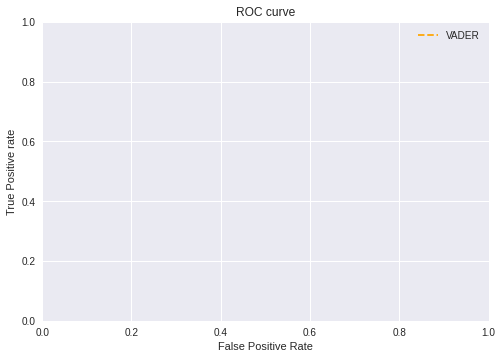

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(blsss, blss, linestyle='--',color='orange', label='VADER')
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
df_c.head()

,SL,User Name,Rating,Review,Medical Name,Resource_Link,Polarity,neg,neu,pos,compound,Sentiment_Type_Vader,Sentiment_Type_TextBlob,Label,Senti_Label_Vader,Senti_Label_TextBlob,Accuracy_Label_Vader,Accuracy_Label_Textblob,Conf_Matrix_Vader,Conf_Matrix_TextBlob
0,1,MM Opel,5.0,chittagong medical college cmc situated port c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.030556,0.031,0.858,0.111,0.7699,Positive,Positive,1,1,1,1,1,TP_for_positive_class,TP_for_positive_class
1,2,NEJAM UDDIN,5.0,medical oldest institution chittagong cityit c...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.067857,0.074,0.855,0.072,-0.0202,Negative,Positive,1,-1,1,0,1,FN_for_positive_class,TP_for_positive_class
2,3,Hridoy Nandi,5.0,chittagong medical college hospital establishe...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.087413,0.000,0.928,0.072,0.8176,Positive,Positive,1,1,1,1,1,TP_for_positive_class,TP_for_positive_class
3,4,Sumon Rahman,4.0,one important old medical college hospital ban...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.207692,0.080,0.782,0.138,0.5267,Positive,Positive,1,1,1,1,1,TP_for_positive_class,TP_for_positive_class
4,5,Chowdhury Ripan,3.0,say great service get due rush incoming existi...,Chattogram Medical College Hospital,"https://www.google.com/maps/@22.3591136,91.841...",0.168750,0.073,0.698,0.229,0.6808,Positive,Positive,0,1,1,0,0,FP_for_neutral_class,FP_for_neutral_class


In [ ]:
from sklearn import svm
classifier_linear = svm.SVC(kernel='linear')

In [ ]:
from  sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

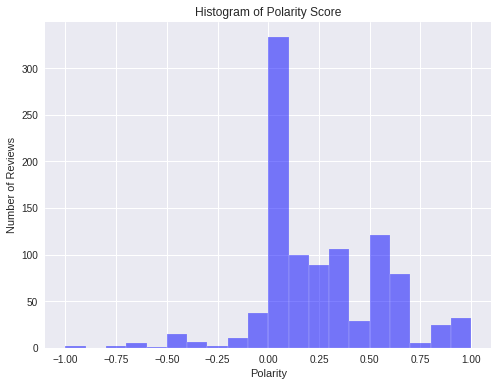

In [ ]:
num_bins = 20
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(df_c.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();


In [ ]:
def rem_stopwords(texts):
    words = word_tokenize(texts)
    return [w for w in words]
jj=df_c.Review.apply(rem_stopwords)
print(jj)

0      [chittagong, medical, college, cmc, situated, ...
1      [medical, oldest, institution, chittagong, cit...
2      [chittagong, medical, college, hospital, estab...
3      [one, important, old, medical, college, hospit...
4      [say, great, service, get, due, rush, incoming...
                             ...                        
993                                               [good]
994                                      [fair, expense]
995    [best, place, general, people, get, treatment,...
996    [good, lacking, quality, hotel, food, insuffic...
997                               [nurse, disrespectful]
Name: Review, Length: 998, dtype: object


In [ ]:
X = np.array(df_c.iloc[:,0].values)
y = np.array(df_c.Label.values)
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(df_c.Review).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (998, 1000)
y.shape =  (998,)


In [ ]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : X = (798, 1000), y = (798,)
Test shapes : X = (200, 1000), y = (200,)


In [ ]:
gnb,mnb,bnb, svv,LR,knn = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True),svm.SVC(kernel='linear'), LogisticRegression(),KNeighborsClassifier(n_neighbors=4)

gnb.fit(trainx,trainy)
mnb.fit(trainx,trainy)
bnb.fit(trainx,trainy)
svv.fit(trainx,trainy)
LR.fit(trainx,trainy)
knn.fit(trainx,trainy)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
ypg = gnb.predict(testx)
ypm = mnb.predict(testx)
ypb = bnb.predict(testx)
snn = svv. predict(testx)
LRS= LR. predict(testx)
knns= knn.predict(testx)
print("Gaussian = ",accuracy_score(testy,ypg))
print("Multinomial = ",accuracy_score(testy,ypm))
print("Bernoulli = ",accuracy_score(testy,ypb))
print("SVM = ",accuracy_score(testy,snn))
print("LR = ",accuracy_score(testy,LRS))
print("knn = ",accuracy_score(testy,knns))

Gaussian =  0.64
Multinomial =  0.825
Bernoulli =  0.76
SVM =  0.805
LR =  0.825
knn =  0.78


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
pred_prob = gnb.predict_proba(testx)
print(pred_prob)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


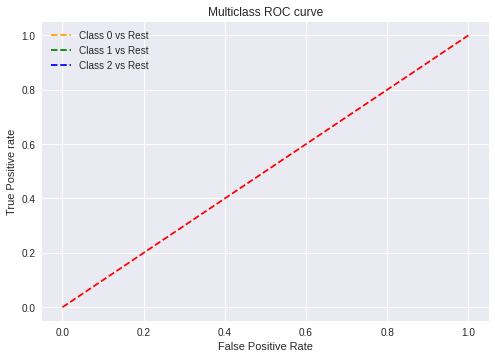

In [ ]:


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(testy, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')